In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as tm

# directly using tree was not working so had to import thr sklearner separately 
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import decomposition
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

from sklearn.metrics.cluster import homogeneity_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.random_projection import GaussianRandomProjection
from sklearn.mixture import GaussianMixture

from sklearn import metrics 
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [76]:
pwd

'/Users/ssandesh/ML_Gatech/Project3'

## Dataset 1: Water Potability

In [77]:
dataset1 = pd.read_csv('datasets/water_potability.csv')
dataset1 = shuffle(dataset1) 
dataset1.dropna(inplace=True)
X_1  = dataset1.iloc[:, :-1]
Y_1 =  dataset1.iloc[:, -1]
X_1 = preprocessing.scale(X_1)

In [78]:
num_dims = dataset1.shape[1]
print(num_dims)

10


Components |   Mean Squared Error
1  		  0.8960859903509226
2  		  0.7840673826844526
3  		  0.671309637679782
4  		  0.5571134805854776
5  		  0.45123988443137086
6  		  0.3322034103827859
7  		  0.2177684853933141
8  		  0.10417137055204312
9  		  1.0965975230303579e-30


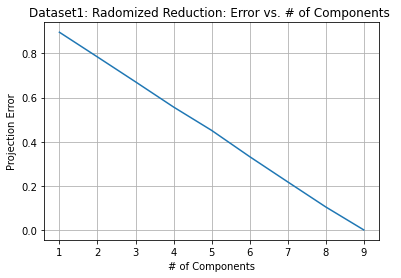

In [79]:
all_dims = np.arange(1,num_dims,1)
random_state = 7
err_arr = []
print("Components | ", " Mean Squared Error" )
for dim in all_dims:
    randomized_dm = GaussianRandomProjection(n_components=dim,compute_inverse_components=True,
                                             random_state=random_state)
    randomized_dm.fit_transform(X_1)
    x_prime = randomized_dm.fit_transform(X_1)
    eigen_values = randomized_dm.components_
    A = np.linalg.pinv(eigen_values.T)
    Z = np.dot(x_prime, A)
    err = mean_squared_error(X_1, Z) 
    err_arr.append(err)
    print(dim, " \t\t " , err )

plt.figure()
plt.plot(all_dims,err_arr)
plt.title('Dataset1: Radomized Reduction: Error vs. # of Components ')
plt.xlabel("# of Components")
plt.ylabel("Projection Error")
plt.grid()
plt.show()

In [80]:
# K-mean Clusttering
best_component_size = 8
ranodomized_best_1 = GaussianRandomProjection(n_components=best_component_size, random_state=random_state)
X1_transform = ranodomized_best_1.fit_transform(X_1)
all_new_row = np.arange(1,best_component_size,1)
X_1_df = pd.DataFrame(X_1)
for comp in all_new_row:
    col_name = "newICACol"+str(comp)
    X_1_df[col_name] = X1_transform[:,comp]
    X_1_df[col_name] = X1_transform[:,comp]
X_1_df.head()

,0,1,2,3,4,5,6,7,8,newICACol1,newICACol2,newICACol3,newICACol4,newICACol5,newICACol6,newICACol7
0,-0.125336,-0.215999,0.630847,0.548368,0.540210,0.481093,-0.595833,0.542000,0.695510,0.432522,0.405621,-0.962805,-0.282280,0.860754,-0.320575,-0.261459
1,0.699283,1.379565,0.199538,-0.330018,-0.352851,-0.202846,-0.375376,-0.590233,-0.516289,-0.123110,-0.292766,0.468579,0.879957,-0.302236,0.047771,0.357846
2,0.767814,0.312390,1.539214,-0.437596,0.335905,-0.335134,0.513806,0.843250,-0.019244,-0.179368,0.055949,-0.807754,0.858210,0.517063,-1.715919,0.264360
3,0.546375,0.485243,-0.692025,-0.314236,1.272682,-0.425818,-1.425542,-1.628001,1.870389,0.408634,-0.519670,1.134040,-0.954616,-1.397291,1.211724,-0.268626
4,-1.200246,0.137812,1.768824,0.168364,-0.520204,1.816887,0.866676,0.531780,-0.864825,-0.849271,2.062507,-0.561926,1.951768,3.544696,-0.483580,-1.360712


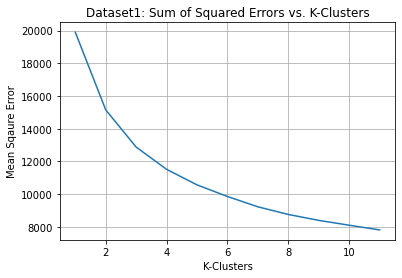

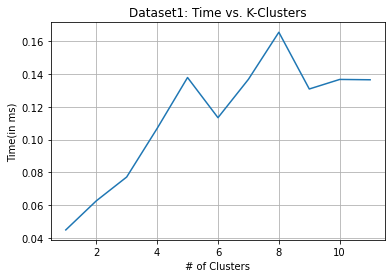

In [81]:
random_state = 7
clusters = np.arange(1,12,1)
sum_of_squared_distances = []
time_array = []
X_1_new = X_1_df.to_numpy()
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    start_time = tm.time()
    kmeans.fit(X1_transform)
    end_time = tm.time()
    time_array.append(end_time - start_time)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters,sum_of_squared_distances)
plt.title('Dataset1: Sum of Squared Errors vs. K-Clusters')
plt.xlabel('K-Clusters')
plt.ylabel("Mean Sqaure Error")
plt.grid()
plt.show()

plt.figure()
plt.plot(clusters,time_array)
plt.title('Dataset1: Time vs. K-Clusters')
plt.xlabel('# of Clusters')
plt.ylabel("Time(in ms)")
plt.grid()
plt.show()

-0.00029574201855375547
For n_clusters = 2 The average silhouette_score is : 0.20635625012243786
For n_clusters = 2 The average homogeneity_score is : 6.928976221645798e-05
0.0022719685943400148
For n_clusters = 3 The average silhouette_score is : 0.18695122334221845
For n_clusters = 3 The average homogeneity_score is : 0.0037162849222069734
0.0028292703962291697
For n_clusters = 4 The average silhouette_score is : 0.16795816773773942
For n_clusters = 4 The average homogeneity_score is : 0.005398122952594845
0.000852984169641998
For n_clusters = 5 The average silhouette_score is : 0.1620025036893331
For n_clusters = 5 The average homogeneity_score is : 0.0029061410091048303
0.005640824999176455
For n_clusters = 6 The average silhouette_score is : 0.1575841235886869
For n_clusters = 6 The average homogeneity_score is : 0.012030013617145325
0.0035530096292805957
For n_clusters = 7 The average silhouette_score is : 0.15279559130896478
For n_clusters = 7 The average homogeneity_score is : 

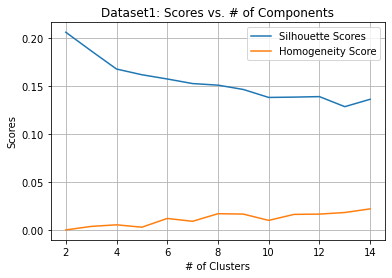

In [82]:
from sklearn import metrics
random_state = 7
clusters = np.arange(2,15,1)
sum_of_squared_distances = []
X_1_new = X_1_df.to_numpy()
silhouette_scores_1 = []
homog_scores_1 = []
for cluster in clusters:
    clusterer = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X1_transform)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1_transform, cluster_labels)
    homog_score = homogeneity_score(Y_1, cluster_labels)
    print(metrics.adjusted_mutual_info_score(Y_1, cluster_labels))
    print(
        "For n_clusters =",
        cluster,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        cluster,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores_1.append(silhouette_avg)
    homog_scores_1.append(homog_score)

plt.figure()
plt.plot(clusters,silhouette_scores_1, label="Silhouette Scores")
plt.plot(clusters,homog_scores_1,  label="Homogeneity Score")
plt.title('Dataset1: Scores vs. # of Components')
plt.xlabel('# of Clusters')
plt.ylabel("Scores")
plt.legend(loc="best")
plt.grid()
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.07918524222418896
For n_clusters = 2 The average homogeneity_score is : 0.017860894745374077
For n_clusters = 3 The average silhouette_score is : 0.033786835078505294
For n_clusters = 3 The average homogeneity_score is : 0.014324467922273057
For n_clusters = 4 The average silhouette_score is : 0.04831798176068207
For n_clusters = 4 The average homogeneity_score is : 0.00839032439677642
For n_clusters = 5 The average silhouette_score is : 0.0933438330363036
For n_clusters = 5 The average homogeneity_score is : 0.00493374472079239
For n_clusters = 6 The average silhouette_score is : 0.041828770854705134
For n_clusters = 6 The average homogeneity_score is : 0.018879276133360205
For n_clusters = 7 The average silhouette_score is : 0.03838443371937302
For n_clusters = 7 The average homogeneity_score is : 0.017022187926930617
For n_clusters = 8 The average silhouette_score is : 0.02531873755132078
For n_clusters = 8 The average homogenei

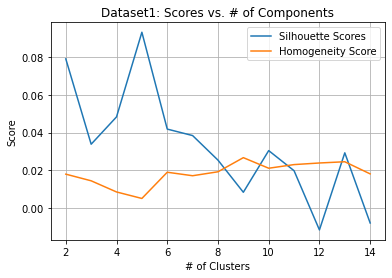

In [83]:
## Expectation Maximization
# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

range_n_clusters = np.arange(2,15,1)
silhouette_scores_gmm_1 = []
homog_scores_gmm_1 = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X1_transform)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1_transform, cluster_labels)
    homog_score = homogeneity_score(Y_1, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        n_clusters,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores_gmm_1.append(silhouette_avg)
    homog_scores_gmm_1.append(homog_score)

plt.figure()
plt.plot(range_n_clusters,silhouette_scores_gmm_1, label="Silhouette Scores")
plt.plot(range_n_clusters,homog_scores_gmm_1,  label="Homogeneity Score")
plt.title('Dataset1: Scores vs. # of Components')
plt.xlabel('# of Clusters')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [84]:
n_clusters=np.arange(2, 12, 1)
bics_gmm_1=[]
bics_err_1=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n_components=n, n_init=2, max_iter=1000).fit(X1_transform) 
        
        tmp_bic.append(gmm.bic(X1_transform))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics_gmm_1.append(val)
    bics_err_1.append(err)

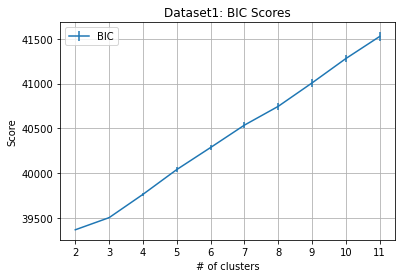

In [85]:
plt.errorbar(n_clusters,bics_gmm_1, yerr=bics_err_1, label='BIC')
plt.title("Dataset1: BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()


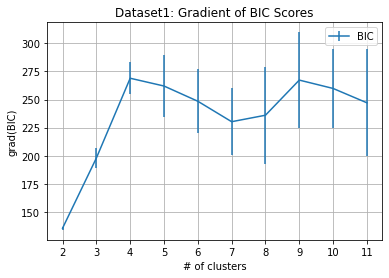

In [86]:
plt.errorbar(n_clusters, np.gradient(bics_gmm_1), yerr=bics_err_1, label='BIC')
plt.title("Dataset1: Gradient of BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("grad(BIC)")
plt.legend()
plt.grid()

## Dataset 2: Raisin Dataset

In [124]:
dataset2 = pd.read_excel('datasets/Raisin_Dataset.xlsx')
dataset2 = shuffle(dataset2) 
dataset2.dropna(inplace=True)
X_2 = dataset2.iloc[:, :-1]
Y_2 =  dataset2.iloc[:, -1]
X_2 = preprocessing.scale(X_2)
num_dims_2= dataset2.shape[1]

Components |   Mean Squared Error
1  		  0.9822218142582521
2  		  0.9353068335703847
3  		  0.8997819099205666
4  		  0.8112010952604153
5  		  0.39339118347750907
6  		  0.2863505270056573
7  		  3.423102517761289e-30


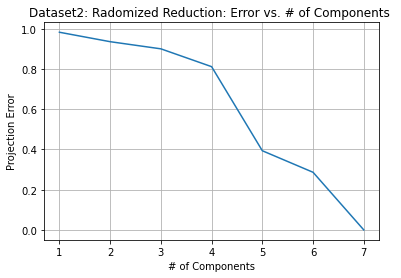

In [130]:
all_dims = np.arange(1,num_dims_2,1)
random_state = 7
err_arr = []
print("Components | ", " Mean Squared Error" )
for dim in all_dims:
    randomized_dm = GaussianRandomProjection(n_components=dim,compute_inverse_components=True,
                                             random_state=random_state)
    randomized_dm.fit_transform(X_2)
    x_prime = randomized_dm.fit_transform(X_2)
    eigen_values = randomized_dm.components_
    A = np.linalg.pinv(eigen_values.T)
    Z = np.dot(x_prime, A)
    err = mean_squared_error(X_2, Z) 
    err_arr.append(err)
    print(dim, " \t\t " , err )

plt.figure()
plt.plot(all_dims,err_arr)
plt.title('Dataset2: Radomized Reduction: Error vs. # of Components ')
plt.xlabel("# of Components")
plt.ylabel("Projection Error")
plt.grid()
plt.show()

In [127]:
# K-mean Clusttering
best_component_size = 8
ranodomized_best_1 = GaussianRandomProjection(n_components=best_component_size, random_state=random_state)
X2_transform = ranodomized_best_1.fit_transform(X_2)
all_new_row = np.arange(1,best_component_size,1)
X_2_df = pd.DataFrame(X_2)
for comp in all_new_row:
    col_name = "newICACol"+str(comp)
    X_2_df[col_name] = X2_transform[:,comp]
    X_2_df[col_name] = X2_transform[:,comp]
X_2_df.head()

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (7 < 8).The dimensionality of the problem will not be reduced.
  warnings.warn(


,0,1,2,3,4,5,6,newICACol1,newICACol2,newICACol3,newICACol4,newICACol5,newICACol6,newICACol7
0,1.400982,0.872240,1.760021,-0.178744,1.317309,1.331176,1.037587,-0.080092,-0.216202,-0.483266,-1.412772,0.275011,0.435204,0.412844
1,1.208526,1.799349,0.372368,1.359533,1.185715,0.696471,1.349872,-0.396147,-0.368701,-1.735055,-0.944375,-0.024573,-0.485172,0.997796
2,-1.263688,-1.267066,-1.582583,0.053926,-1.261971,1.140161,-1.444806,0.393908,-1.129484,0.621101,2.160686,0.628780,1.602403,-0.760967
3,0.476877,0.356810,0.662630,0.129583,0.449483,-0.395213,0.422026,-0.192305,0.414558,-0.064886,-0.645662,-0.036814,-0.694996,0.225455
4,1.064325,1.583310,0.312190,1.292890,1.037850,-0.183728,1.337065,-0.529553,0.193185,-1.543149,-1.046497,-0.215152,-1.098494,0.900452


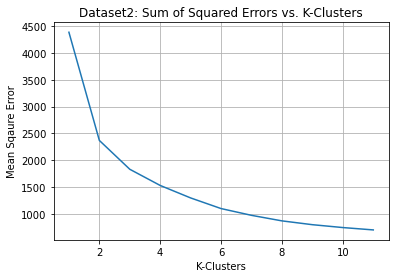

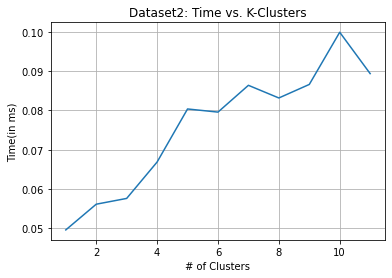

In [115]:
random_state = 7
clusters = np.arange(1,12,1)
sum_of_squared_distances = []
time_array = []
X_1_new = X_1_df.to_numpy()
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    start_time = tm.time()
    kmeans.fit(X2_transform)
    end_time = tm.time()
    time_array.append(end_time - start_time)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters,sum_of_squared_distances)
plt.title('Dataset2: Sum of Squared Errors vs. K-Clusters')
plt.xlabel('K-Clusters')
plt.ylabel("Mean Sqaure Error")
plt.grid()
plt.show()

plt.figure()
plt.plot(clusters,time_array)
plt.title('Dataset2: Time vs. K-Clusters')
plt.xlabel('# of Clusters')
plt.ylabel("Time(in ms)")
plt.grid()
plt.show()

0.35647755270732
For n_clusters = 2 The average silhouette_score is : 0.430014430881835
For n_clusters = 2 The average homogeneity_score is : 0.3428247172814161
0.2969762612514941
For n_clusters = 3 The average silhouette_score is : 0.3052389170965541
For n_clusters = 3 The average homogeneity_score is : 0.3747589772125208
0.3056757689878357
For n_clusters = 4 The average silhouette_score is : 0.3102871174001446
For n_clusters = 4 The average homogeneity_score is : 0.39515163497740313
0.2767532101251461
For n_clusters = 5 The average silhouette_score is : 0.29719270868961517
For n_clusters = 5 The average homogeneity_score is : 0.4062716123218806
0.27052151692937887
For n_clusters = 6 The average silhouette_score is : 0.3035689547416127
For n_clusters = 6 The average homogeneity_score is : 0.4244956021824759
0.2558913937513131
For n_clusters = 7 The average silhouette_score is : 0.2664639242007922
For n_clusters = 7 The average homogeneity_score is : 0.44441507539018055
0.2380237468103

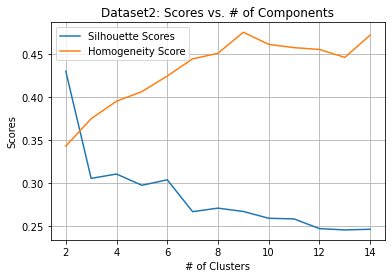

In [116]:
from sklearn import metrics
random_state = 7
clusters = np.arange(2,15,1)
sum_of_squared_distances = []
X_2_new = X_2_df.to_numpy()
silhouette_scores_2 = []
homog_scores_2 = []
for cluster in clusters:
    clusterer = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X2_transform)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2_transform, cluster_labels)
    homog_score = homogeneity_score(Y_2, cluster_labels)
    print(metrics.adjusted_mutual_info_score(Y_2, cluster_labels))
    print(
        "For n_clusters =",
        cluster,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        cluster,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores_2.append(silhouette_avg)
    homog_scores_2.append(homog_score)

plt.figure()
plt.plot(clusters,silhouette_scores_2, label="Silhouette Scores")
plt.plot(clusters,homog_scores_2,  label="Homogeneity Score")
plt.title('Dataset2: Scores vs. # of Components')
plt.xlabel('# of Clusters')
plt.ylabel("Scores")
plt.legend(loc="best")
plt.grid()
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.40329356505168074
For n_clusters = 2 The average homogeneity_score is : 0.37046623696743197
For n_clusters = 3 The average silhouette_score is : 0.2413085913082257
For n_clusters = 3 The average homogeneity_score is : 0.38378304916335143
For n_clusters = 4 The average silhouette_score is : 0.18138336701166916
For n_clusters = 4 The average homogeneity_score is : 0.3789350411800134
For n_clusters = 5 The average silhouette_score is : 0.17372104799988022
For n_clusters = 5 The average homogeneity_score is : 0.44099558692206947
For n_clusters = 6 The average silhouette_score is : 0.12991092882949487
For n_clusters = 6 The average homogeneity_score is : 0.4395953444444927
For n_clusters = 7 The average silhouette_score is : 0.11390285257063618
For n_clusters = 7 The average homogeneity_score is : 0.44500086809891487
For n_clusters = 8 The average silhouette_score is : 0.08747514471491813
For n_clusters = 8 The average homogeneity_score

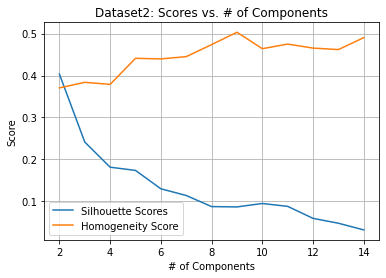

In [117]:
## Expectation Maximization
# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

range_n_clusters = np.arange(2,15,1)
silhouette_scores_gmm_2 = []
homog_scores_gmm_2 = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X2_transform)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2_transform, cluster_labels)
    homog_score = homogeneity_score(Y_2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        n_clusters,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores_gmm_2.append(silhouette_avg)
    homog_scores_gmm_2.append(homog_score)

plt.figure()
plt.plot(range_n_clusters,silhouette_scores_gmm_2, label="Silhouette Scores")
plt.plot(range_n_clusters,homog_scores_gmm_2,  label="Homogeneity Score")
plt.title('Dataset2: Scores vs. # of Components')
plt.xlabel('# of Components')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [118]:
n_clusters=np.arange(2, 12, 1)
bics_gmm_2=[]
bics_err_2=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n_components=n, n_init=2, max_iter=1000).fit(X2_transform) 
        
        tmp_bic.append(gmm.bic(X2_transform))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics_gmm_2.append(val)
    bics_err_2.append(err)


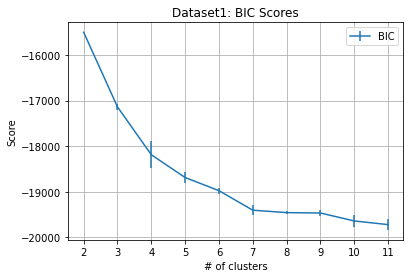

In [119]:
plt.errorbar(n_clusters,bics_gmm_2, yerr=bics_err_2, label='BIC')
plt.title("Dataset1: BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()


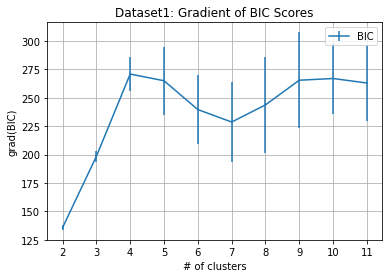

In [74]:
plt.errorbar(n_clusters, np.gradient(bics_gmm_2), yerr=bics_err_2, label='BIC')
plt.title("Dataset1: Gradient of BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("grad(BIC)")
plt.legend()
plt.grid()

## Neural Network

In [90]:
X_train, X_test, y_train, y_test = train_test_split( X1_transform, Y_1, test_size=0.20, random_state=7)

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

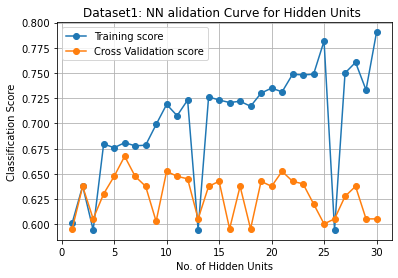

In [91]:
#hyperparameter tuning
hidden_unit_size = 30
test_data = np.zeros(hidden_unit_size)
train_data = np.zeros(hidden_unit_size)
hidden_layers = list(range(1, hidden_unit_size+1)) 

for i in hidden_layers:
    clf_NN = MLPClassifier(solver='lbfgs', activation='relu',
                    hidden_layer_sizes=(i,2), random_state=7)
    clf_NN.fit(X_train,y_train)
    y_pred = clf_NN.predict(X_test)
    y_pred_train = clf_NN.predict(X_train)
    test_data[i-1] = metrics.accuracy_score(y_test, y_pred)
    train_data[i-1] = metrics.accuracy_score(y_train, y_pred_train)

plt.figure()
plt.plot(hidden_layers,train_data ,'o-', label='Training score')
plt.plot(hidden_layers,test_data ,'o-', label='Cross Validation score')
plt.title('Dataset1: NN alidation Curve for Hidden Units ')
plt.xlabel('No. of Hidden Units')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.ticklabel_format(useOffset=False)
plt.show()

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

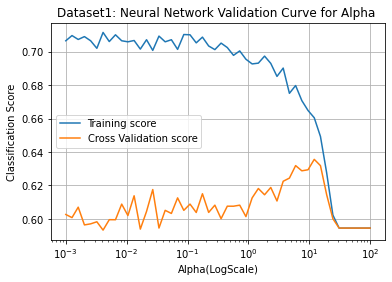

In [92]:
# Two hyperparameter to tune are the Learning Rate and numeber of hidden perceptrons hidden_layer_sizes
cv = StratifiedKFold(n_splits=5)
alpha_val = np.logspace(-3, 2, 50)
clf_NN = MLPClassifier(solver='lbfgs', activation='relu',
                    hidden_layer_sizes=(8,2), random_state=7)
train_scores, test_scores = validation_curve(clf_NN, X_train, y_train, param_name="alpha",
                                             param_range=alpha_val, cv=cv, n_jobs=-1)

plt.figure()
plt.semilogx(alpha_val, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(alpha_val, np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset1: Neural Network Validation Curve for Alpha ')
plt.xlabel('Alpha(LogScale)')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
#plt.ticklabel_format(useOffset=False)
plt.show()

Fit time with reduced features = 0.14862895011901855
Inference time with Clusttering with reduced features = 0.0008118152618408203
65.2605459057072


/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

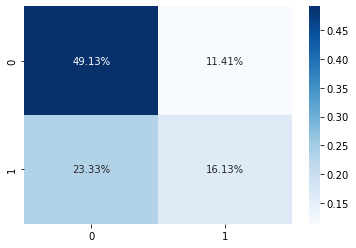

In [110]:
best_hidden_layers=(8,2)
best_alpha=0.01
clf_NN_best= MLPClassifier(solver='lbfgs', activation='relu',alpha=best_alpha,
                    hidden_layer_sizes=best_hidden_layers, random_state=7)
t_before = tm.time()
clf_NN_best = clf_NN_best.fit(X_train,y_train)
t_after = tm.time()
print('Fit time with reduced features =',  t_after - t_before)
t_before = tm.time()
y_pred = clf_NN_best.predict(X_test)
t_after = tm.time()
print('Inference time with Clusttering with reduced features =',  t_after - t_before)
#inference_time[4] = t_after - t_before
#accuracy_after[4] = metrics.accuracy_score(y_test, y_pred)*100
print(metrics.accuracy_score(y_test, y_pred)*100)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

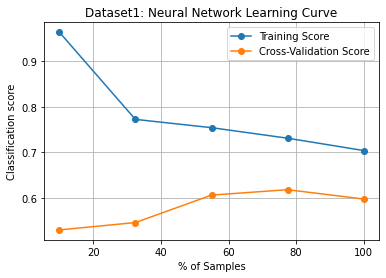

In [94]:
cv = StratifiedKFold(n_splits=5)
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes,train_scores, test_scores = learning_curve(clf_NN_best, X_train,
                                           y_train,cv=cv,n_jobs=-1,train_sizes=train_sizes)
train_sizes=(train_sizes/train_sizes[-1])*100
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.grid()
plt.title('Dataset1: Neural Network Learning Curve')
plt.xlabel('% of Samples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.show()

In [95]:
# After clusterring and adding features

In [96]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split( X_1_new , Y_1, test_size=0.20, random_state=7)

time with Clusttering and added new features = 0.16147875785827637
Inferece time with Clusttering and added new features = 0.0008943080902099609
60.545905707196034


/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

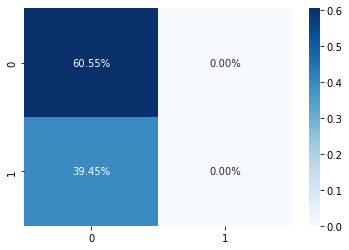

In [111]:
best_hidden_layers=(8,2)
best_alpha=0.02
clf_NN_best_c= MLPClassifier(solver='lbfgs', activation='relu',alpha=best_alpha,
                    hidden_layer_sizes=best_hidden_layers, random_state=7)
t_before = tm.time()
clf_NN_best = clf_NN_best_c.fit(X_train_c,y_train_c)
t_after = tm.time()
print('time with Clusttering and added new features =',  t_after - t_before)
t_before = tm.time()
y_pred_c = clf_NN_best.predict(X_test_c)
t_after = tm.time()
print('Inferece time with Clusttering and added new features =',  t_after - t_before)
#accuracy_after[4] = metrics.accuracy_score(y_test, y_pred)*100
print(metrics.accuracy_score(y_test_c, y_pred_c)*100)
cm=confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

